# **Estimation of House Value in California**

### **Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
import urllib

In [2]:
dataset_path = os.path.join("dataset")
download_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

def fetch_data(download_url= download_url, dataset_path= dataset_path):
    os.makedirs(dataset_path, exist_ok= True)
    tgz_path = os.path.join(dataset_path, "housing.tgz")
    urllib.request.urlretrieve(download_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path= dataset_path)
    housing_tgz.close()

fetch_data()

def load_data(dataset_path= dataset_path):
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path)

housing_data = load_data()
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Here **median_house_value** is the dependent attribute and **longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households and median_income** are independent attributes.

**ocean_proximity** needs to be encoded to train the model which will be dealt with later.

### **EDA**

**Data Cleaning**

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_data[housing_data['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


**total_bedrooms** have 207 null values.

In [5]:
housing_data['total_bedrooms']=housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].dropna().mean())

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
housing_data[housing_data.duplicated()==True].count()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

No duplicates.

In [9]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Plots**

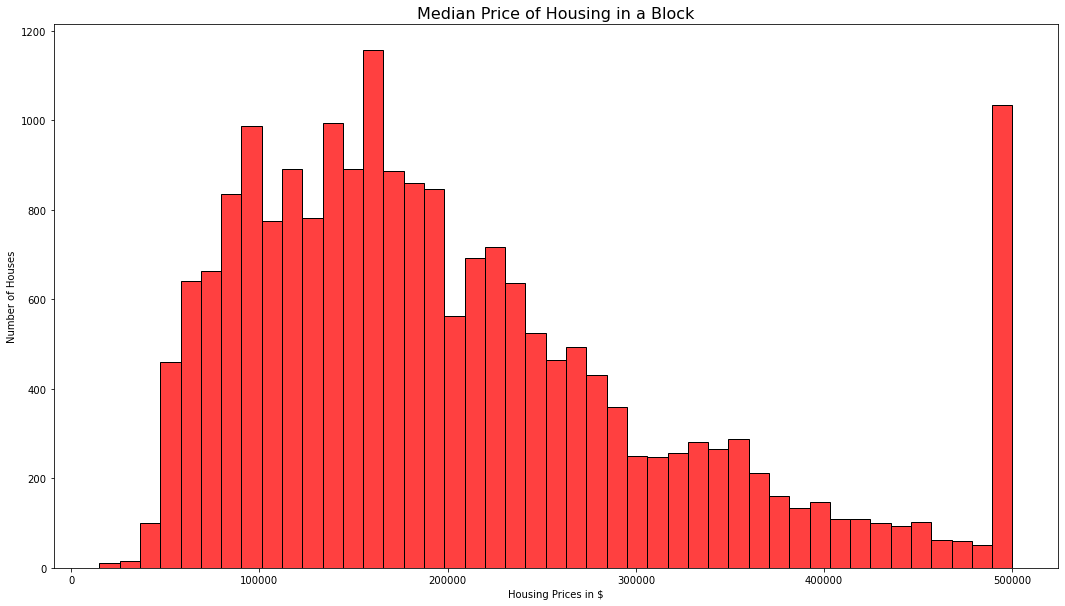

In [10]:
plt.figure(figsize=(18, 10))
sns.histplot(housing_data.median_house_value, bins = 45, color='red')
plt.xlabel('Housing Prices in $')
plt.ylabel('Number of Houses')
plt.title('Median Price of Housing in a Block', fontsize=16)
plt.show()

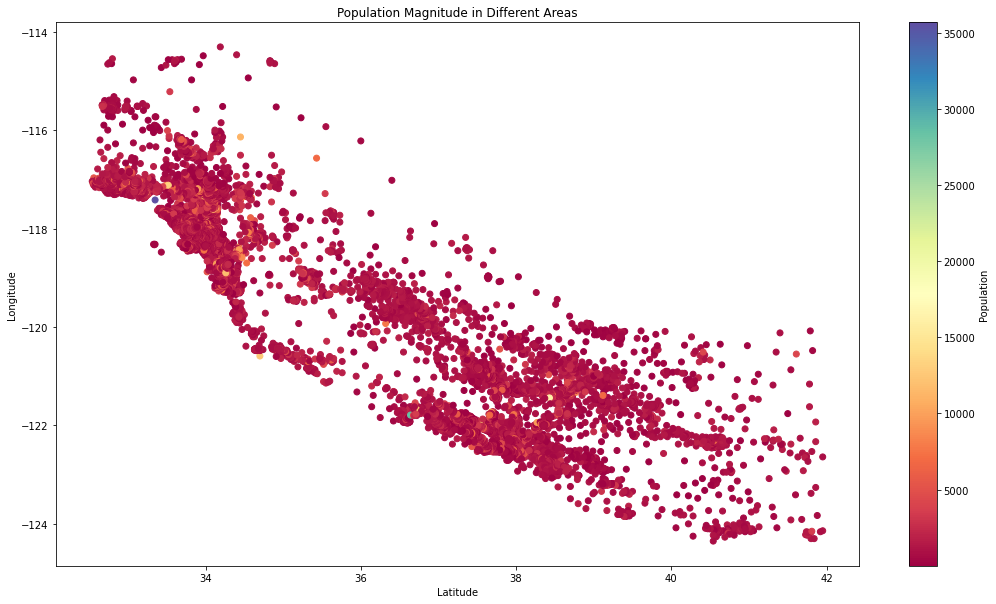

In [11]:
plt.figure(figsize=(18,10))
plt.scatter(housing_data['latitude'],housing_data['longitude'],c=housing_data['population'], cmap='Spectral')
plt.colorbar().set_label("Population")
plt.title('Population Magnitude in Different Areas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

It can be inferred that most of the places have **Population<5000**.

There are very few places with **Population>15000**.

Text(0.5, 1.0, 'Median Age of Housing')

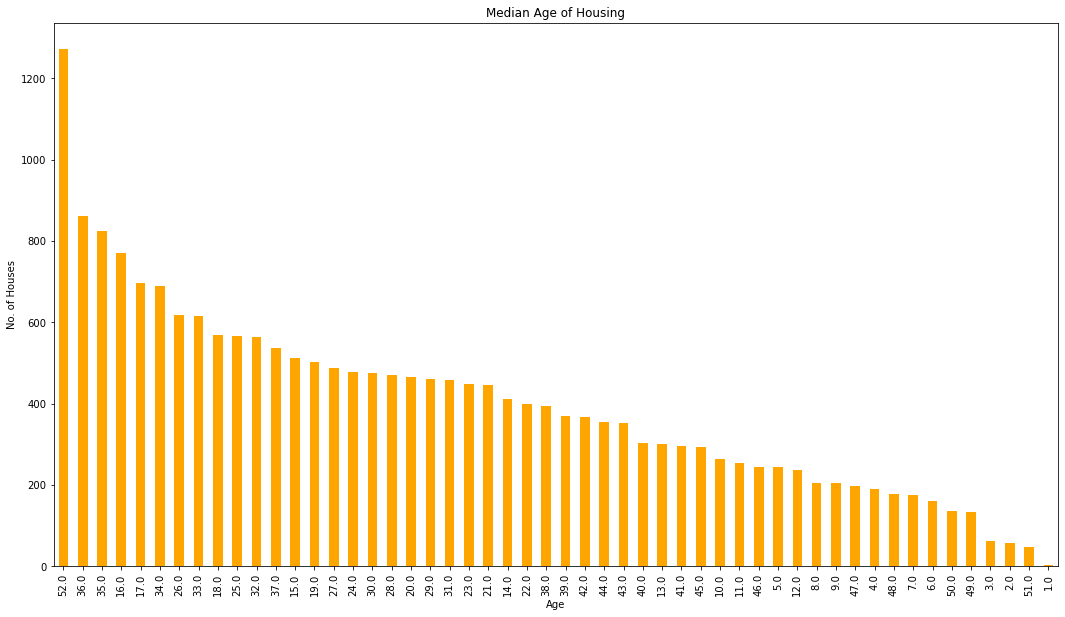

In [12]:
plt.figure(figsize=(18,10))
housing_data['housing_median_age'].value_counts().plot(kind='bar',color='orange')
plt.xlabel("Age")
plt.ylabel("No. of Houses")
plt.title("Median Age of Housing")

The maximum number of houses are **52** years old.

Text(0.5, 1.0, 'Preferred Proximity from Ocean')

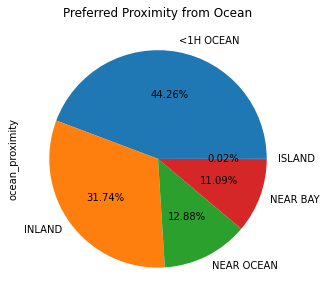

In [13]:
plt.figure(figsize=(9,5))
housing_data['ocean_proximity'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Preferred Proximity from Ocean')

This shows most of the houses are in **<1H proximity** from the ocean.

**Island** has the least number of houses.

Text(0.5, 1.0, 'Correlation Matrix')

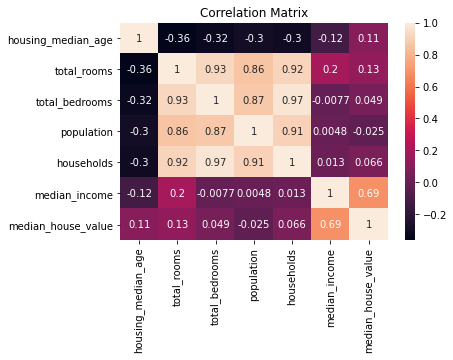

In [14]:
sns.heatmap(housing_data.iloc[:,2:9].corr(),annot=True)
plt.title("Correlation Matrix")

Many features have negligible correlation between them.

Features like **population,total_bedrooms,total_rooms,households** are highly correlated.

Maximum correlation is seen between **households and total_bedrooms**.

**median_house_value** has maximum correlation with **median_income**.

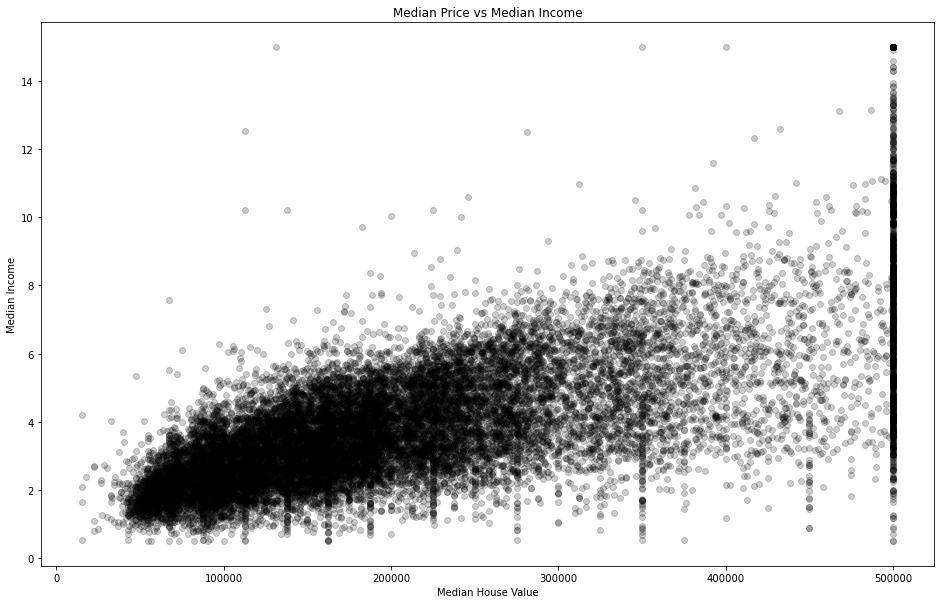

In [15]:
plt.figure(figsize=(16, 10))
plt.scatter(housing_data['median_house_value'],housing_data['median_income'], alpha=0.2,color='black')
plt.xlabel('Median House Value')
plt.ylabel('Median Income')
plt.title('Median Price vs Median Income')
plt.show()

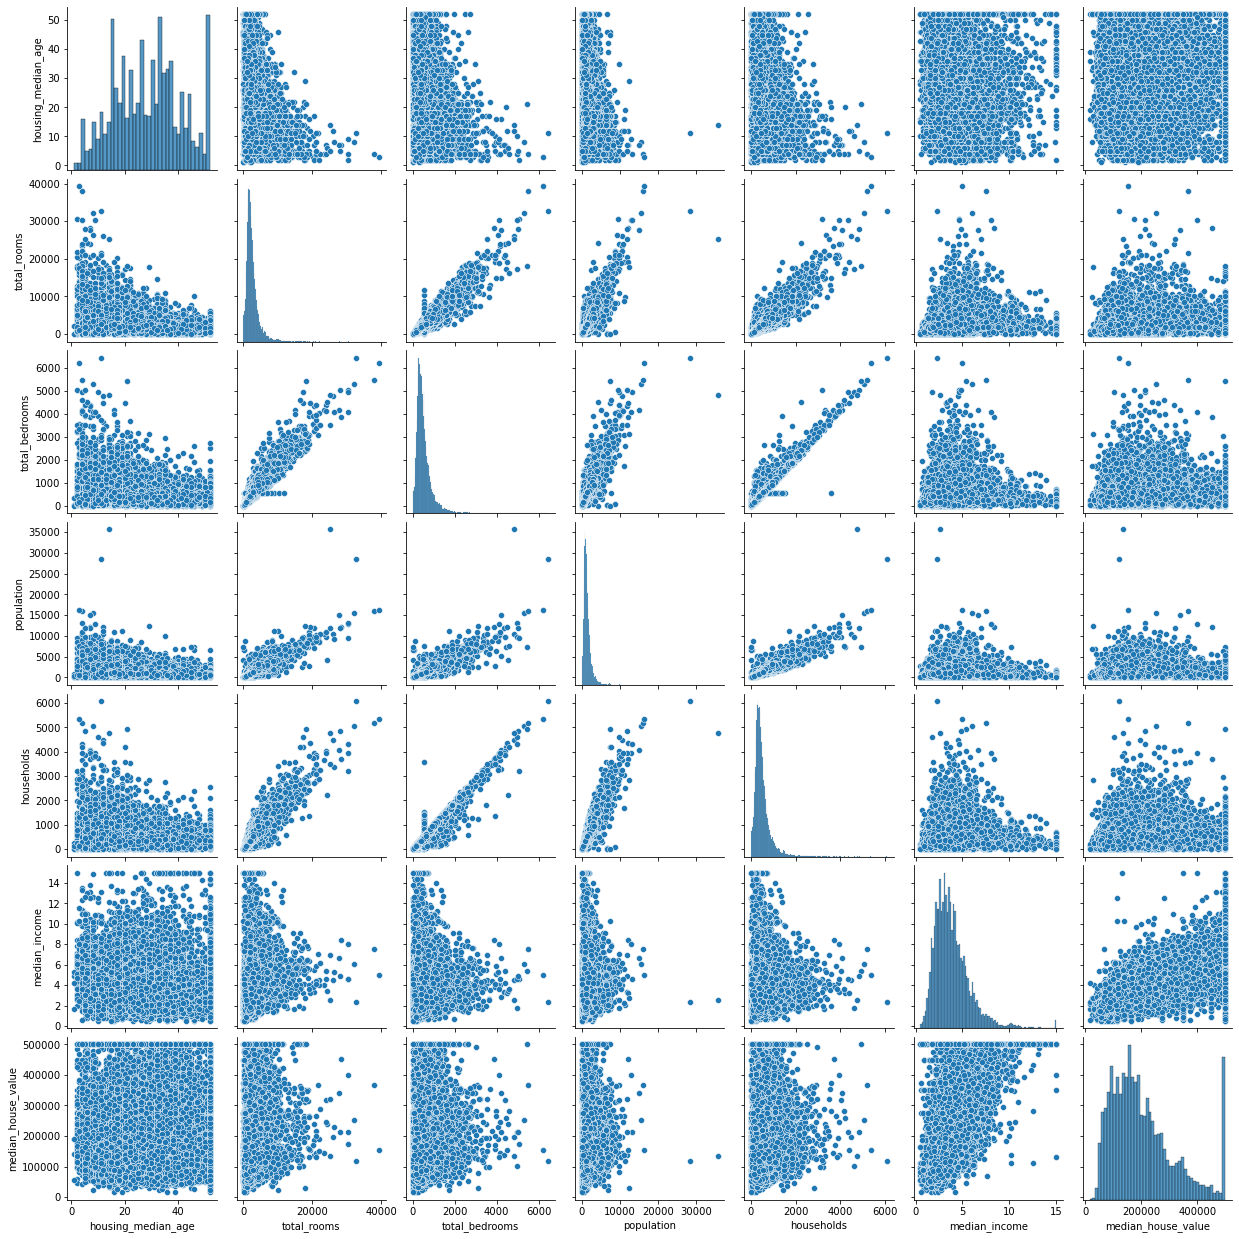

In [16]:
sns.pairplot(housing_data.iloc[:,2:9])

The correlation between all the factors is depicted by this.

It is clear from this that the price of the houses don't vary linearly with any of the parameters.

### **Feature Engineering**

**Modifying the Features to get a Better Model**

In [17]:
housing_data['rooms_per_household']=housing_data['total_rooms']/housing_data['households']
housing_data['bedrooms_per_room']=housing_data['total_bedrooms']/housing_data['total_rooms']
housing_data['bedrooms_per_household']=housing_data['total_bedrooms']/housing_data['households']
housing_data['household_per_population']=housing_data['households']/housing_data['population']
housing_data['population_per_room']=housing_data['population']/housing_data['total_rooms']
housing_data['population_per_bedroom']=housing_data['population']/housing_data['total_bedrooms']

Added more features.

In [18]:
list(housing_data.columns.values)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'bedrooms_per_household',
 'household_per_population',
 'population_per_room',
 'population_per_bedroom']

In [19]:
housing_data=housing_data[['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
'bedrooms_per_household',
 'household_per_population',
'population_per_room',
'population_per_bedroom',
 'median_house_value']]

In [20]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,bedrooms_per_household,household_per_population,population_per_room,population_per_bedroom,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,1.023810,0.391304,0.365909,2.496124,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,0.971880,0.473969,0.338217,2.170886,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,1.073446,0.356855,0.338105,2.610526,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,1.073059,0.392473,0.437991,2.374468,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,1.081081,0.458407,0.347265,2.017857,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,1.133333,0.390533,0.507508,2.259358,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,1.315789,0.320225,0.510760,2.373333,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,1.120092,0.429990,0.446761,2.076289,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,1.171920,0.470985,0.398387,1.811736,84700.0


**One Hot Encoding**

As mentioned earlier, **ocean_proximity** needs to be encoded as it is a categorical data.

In [21]:
X=housing_data.iloc[:,:-1].values
y=housing_data.iloc[:,-1].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[8])],remainder='passthrough')

In [22]:
X=np.array(ct.fit_transform(X))

**Splitting into Train set and Test set**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

**Scaling the Features**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[:,3:]=scaler.fit_transform(X_train[:,3:])
X_test[:,3:]=scaler.transform(X_test[:,3:])

### **Fitting Linear Regression Model**

In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### **Predicting Test Set Results**

In [26]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
compare=(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

In [27]:
compare

array([[140189.  , 117600.  ],
       [276128.75, 292200.  ],
       [186393.  , 131300.  ],
       ...,
       [164224.  , 102900.  ],
       [276732.25, 279500.  ],
       [123115.  , 129300.  ]])

This is the comparision between the predicted(left) and the original(right) values corresponding to the test set.

Some values are very close while some have a significant difference.

### **Measuring the Accuracy**

Here, the accuracy is being determined by the **R-Squared** metric.

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6908832490642367

Hence our model is **69.08%** accurate in predicting the housing prices given the parameters. 